# Maximizing Revenue for taxi cab drivers through payment type analysis

## Problem Statement
 - in the fast paced taxi booking sector making the most revenue is essential for long-term sucess and driver happiness. Our goal is to use data driven insights tomaximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount 

## Objective
 - this project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use python hypothesis testing and descriptive statistics to extract useful information  that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
 - Is there a relationship beyween  total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

## Importing Libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [200]:
df = pd.read_csv('taxidata.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory data analysis

In [202]:
df.shape

(500000, 18)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               499078 non-null  float64
 1   tpep_pickup_datetime   500000 non-null  object 
 2   tpep_dropoff_datetime  500000 non-null  object 
 3   passenger_count        499078 non-null  float64
 4   trip_distance          500000 non-null  float64
 5   RatecodeID             499078 non-null  float64
 6   store_and_fwd_flag     499078 non-null  object 
 7   PULocationID           500000 non-null  float64
 8   DOLocationID           500000 non-null  float64
 9   payment_type           499078 non-null  float64
 10  fare_amount            500000 non-null  float64
 11  extra                  500000 non-null  float64
 12  mta_tax                500000 non-null  float64
 13  tip_amount             500000 non-null  float64
 14  tolls_amount           500000 non-nu

In [206]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [208]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [210]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'duration', 'trip_distance']]
df

,passenger_count,payment_type,fare_amount,duration,trip_distance
0,1.0,1.0,6.0,4.800000,1.20
1,1.0,1.0,7.0,7.416667,1.20
2,1.0,1.0,6.0,6.183333,0.60
3,1.0,1.0,5.5,4.850000,0.80
4,1.0,2.0,3.5,2.300000,0.00
...,...,...,...,...,...
499995,1.0,2.0,8.0,8.083333,1.57
499996,1.0,1.0,22.5,18.316667,7.42
499997,1.0,1.0,19.0,16.383333,5.82
499998,1.0,1.0,6.5,6.283333,1.30


In [212]:
df.isnull().sum()/len(df)

passenger_count    0.001844
payment_type       0.001844
fare_amount        0.000000
duration           0.000000
trip_distance      0.000000
dtype: float64

In [214]:
df.dropna(inplace=True)

In [216]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [218]:
df.duplicated().sum()

93218

In [220]:
df.drop_duplicates(inplace=True)

In [222]:
df.shape

(405860, 5)

In [224]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.620835
2    0.191455
3    0.059843
5    0.044976
4    0.036276
6    0.027354
0    0.019238
8    0.000012
7    0.000005
9    0.000005
Name: proportion, dtype: float64

In [226]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.634258
2    0.354879
3    0.006820
4    0.004043
Name: proportion, dtype: float64

In [228]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [230]:
df.shape

(382786, 5)

In [232]:
df['payment_type'].replace({1: 'Card',2: 'Cash'}, inplace=True)

In [234]:
df

,passenger_count,payment_type,fare_amount,duration,trip_distance
0,1,Card,6.0,4.800000,1.20
1,1,Card,7.0,7.416667,1.20
2,1,Card,6.0,6.183333,0.60
3,1,Card,5.5,4.850000,0.80
4,1,Cash,3.5,2.300000,0.00
...,...,...,...,...,...
499990,1,Cash,9.0,9.783333,1.67
499991,1,Card,20.0,18.316667,5.70
499995,1,Cash,8.0,8.083333,1.57
499996,1,Card,22.5,18.316667,7.42


In [236]:
df.describe()

,passenger_count,fare_amount,duration,trip_distance
count,382786.000000,382786.000000,382786.000000,382786.000000
mean,1.630862,14.752487,18.458804,3.693428
std,1.075461,13.888192,78.296367,4.517048
min,1.000000,-110.000000,0.000000,-0.880000
25%,1.000000,7.000000,7.116667,1.160000
50%,1.000000,10.000000,11.700000,2.020000
75%,2.000000,16.500000,18.266667,3.990000
max,5.000000,1238.000000,2458.400000,110.510000


In [238]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x273d27d5430>,
 'caps': [<matplotlib.lines.Line2D at 0x273e0278440>,
 'boxes': [<matplotlib.lines.Line2D at 0x273e02795b0>],
 'medians': [<matplotlib.lines.Line2D at 0x273e027ba70>],
 'fliers': [<matplotlib.lines.Line2D at 0x273e027bef0>],
 'means': []}

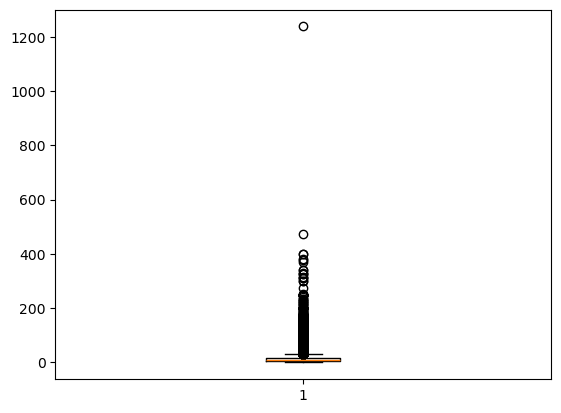

In [240]:
plt.boxplot(df['fare_amount'])

In [242]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    lower_limit = q1-1.5*iqr
    upper_limit = q1+1.5*iqr
    df = df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [244]:
df

,passenger_count,payment_type,fare_amount,duration,trip_distance
0,1,Card,6.0,4.800000,1.20
1,1,Card,7.0,7.416667,1.20
2,1,Card,6.0,6.183333,0.60
3,1,Card,5.5,4.850000,0.80
5,1,Cash,2.5,0.883333,0.03
...,...,...,...,...,...
499977,1,Card,11.5,15.983333,1.70
499982,1,Cash,9.0,11.383333,1.55
499987,1,Card,12.0,15.016667,2.55
499990,1,Cash,9.0,9.783333,1.67


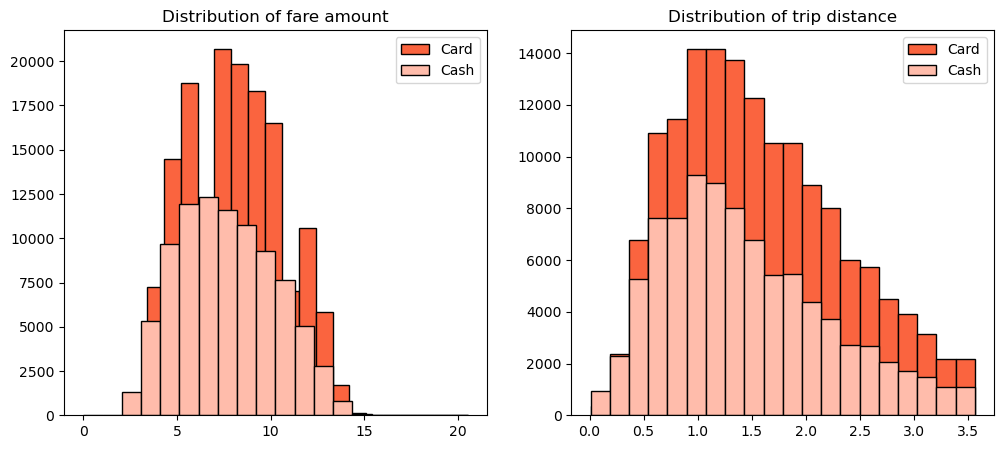

In [246]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, 
        edgecolor='k', color='#FA643F', label='Card'
        )
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20,
        edgecolor='k', color='#FFBCAB', label='Cash'
        )
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, 
        edgecolor='k', color='#FA643F', label='Card'
        )
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20,
        edgecolor='k', color='#FFBCAB', label='Cash'
        )
plt.legend()
plt.show()



In [248]:
# Calculating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount':['mean', 'std'],
                                'trip_distance':['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            8.062602  2.499449      1.573618  0.767391
Cash            7.737868  2.527225      1.440684  0.764485

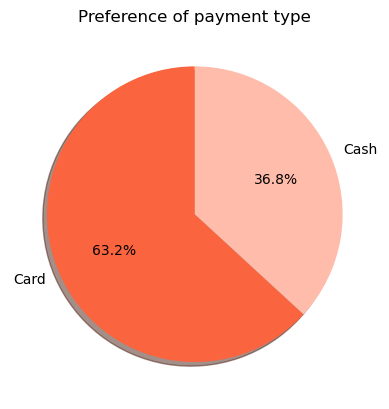

In [250]:
plt.title('Preference of payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),
        labels = df['payment_type'].value_counts().index,
        startangle=90,shadow=True, autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [252]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [254]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,97478,40.538472
1,Card,2,31318,13.024312
2,Card,3,9791,4.071813
3,Card,4,4910,2.041937
4,Card,5,8370,3.480857
5,Cash,1,56411,23.459814
6,Cash,2,17748,7.380915
7,Cash,3,6012,2.500229
8,Cash,4,4168,1.733359
9,Cash,5,4252,1.768292


In [262]:
df1 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df1['payment_type'] = ['Card','Cash']
df1.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,40.538472,13.024312,4.071813,2.041937,3.480857
1,Cash,23.459814,7.380915,2.500229,1.733359,1.768292


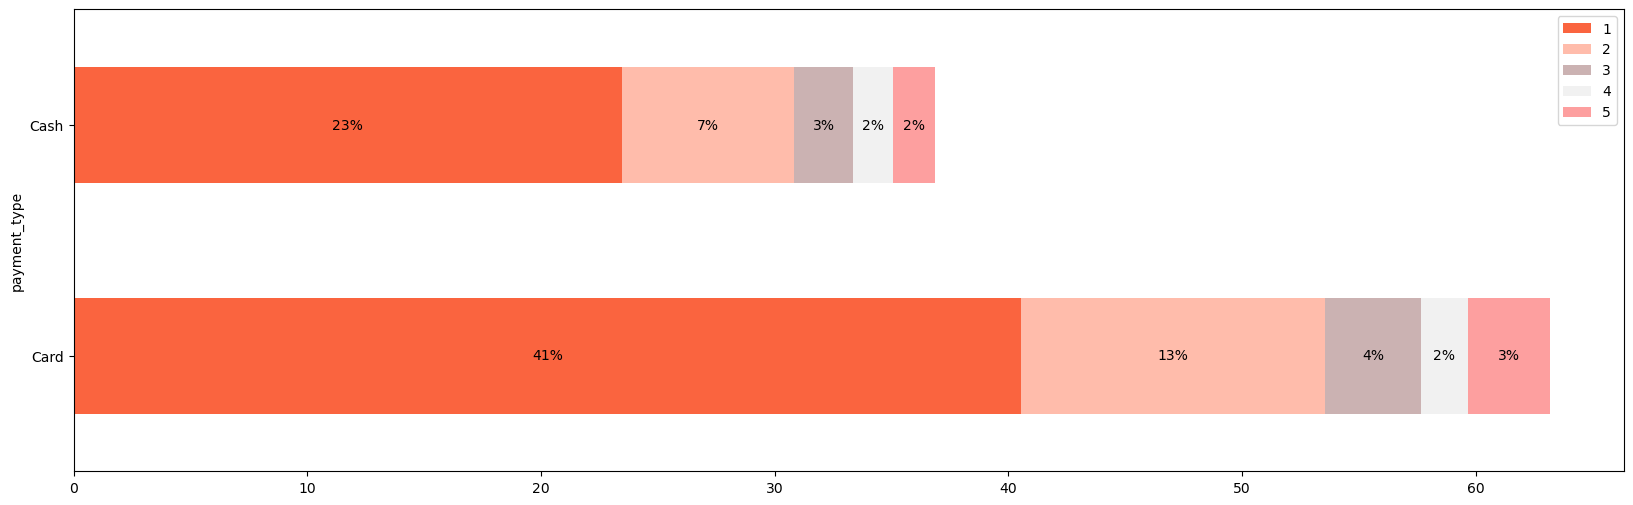

In [264]:
fig, ax = plt.subplots(figsize=(20,6))
df1.plot(x='payment_type', kind='barh',stacked=True,ax=ax,
        color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'
        
        ])
# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center'
           )

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash.

In [258]:
import statsmodels.api as sm
import scipy.stats as st

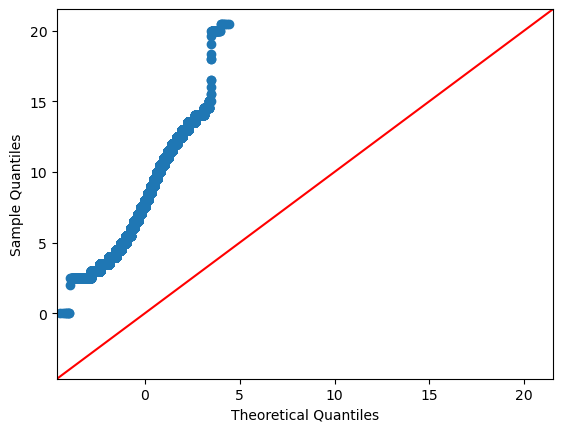

In [260]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [270]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [272]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistics:', t_stats, 'P-value:',p_value)

T statistics: 30.5173473549054 P-value: 4.98878252490141e-204
